In [1]:
import pandas as pd
from pathlib import Path
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import math



In [17]:
#respath = Path("../../results_ig/s123/") 
respath = Path("/Users/jangorecki/PythonWork/bcause/papers/gradient_journal/results/synthetic/s123")    # TODO : set the local path here
filenames = glob.glob(f"{respath}/*.csv")
print(len(filenames))

3232


In [18]:
data = pd.concat([pd.read_csv(respath.joinpath(f), index_col=0) for f in filenames], axis=0, ignore_index=True)

In [19]:
data["time"]= data.tlearn + data.tinfer

In [20]:
data

,modelname,method,cause,effect,tol,num_runs_param,max_iter_param,seed,tlearn,tinfer,remove_outliers,datasize,pns_low_exact,pns_upp_exact,pns_low,pns_upp,rrmse,rmse,nruns,time
0,random_mc2_n5_mid3_d1000_05_mr098_r10_121,GDCC,V3,V1,1.000000e-07,100,NaN,1,8378.743172,557.891130,False,1000,0.214340,0.280093,0.240966,0.249936,3.171097,0.040229,5,8936.634302
1,random_mc2_n5_mid3_d1000_05_mr098_r10_121,GDCC,V3,V1,1.000000e-07,100,NaN,1,17033.575535,1180.490732,False,1000,0.214340,0.280093,0.240546,0.250187,2.916358,0.039763,10,18214.066267
2,random_mc2_n5_mid3_d1000_05_mr098_r10_121,GDCC,V3,V1,1.000000e-07,100,NaN,1,25436.905384,1754.078388,False,1000,0.214340,0.280093,0.233442,0.255007,1.033894,0.031531,15,27190.983772
3,random_mc2_n5_mid3_d1000_05_mr098_r10_121,GDCC,V3,V1,1.000000e-07,100,NaN,1,34271.478653,2426.744223,False,1000,0.214340,0.280093,0.233442,0.259119,0.781239,0.028369,20,36698.222876
4,random_mc2_n5_mid3_d1000_05_mr098_r10_121,GDCC,V3,V1,1.000000e-07,100,NaN,1,42641.368628,2988.165140,False,1000,0.214340,0.280093,0.233442,0.259119,0.781239,0.028369,25,45629.533768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64586,random_mc2_n6_mid3_d1000_05_mr098_r10_190,GDCC,V1,V3,1.000000e-03,100,NaN,1,146442.103863,8615.043402,False,1500,0.666616,0.789959,0.689254,0.784475,0.172974,0.023293,80,155057.147264
64587,random_mc2_n6_mid3_d1000_05_mr098_r10_190,GDCC,V1,V3,1.000000e-03,100,NaN,1,156229.829311,9461.418629,False,1500,0.666616,0.789959,0.689254,0.784475,0.172974,0.023293,85,165691.247940
64588,random_mc2_n6_mid3_d1000_05_mr098_r10_190,GDCC,V1,V3,1.000000e-03,100,NaN,1,165476.303339,9275.843143,False,1500,0.666616,0.789959,0.689254,0.784475,0.172974,0.023293,90,174752.146482
64589,random_mc2_n6_mid3_d1000_05_mr098_r10_190,GDCC,V1,V3,1.000000e-03,100,NaN,1,175171.758652,9759.132385,False,1500,0.666616,0.789959,0.689254,0.784475,0.172974,0.023293,95,184930.891037


In [21]:
data["iter"] = data["max_iter_param"]

# Select the relevant data
df = data[["nruns", "time",  'rmse', 'method', "remove_outliers", "iter", "tol"]]
df = df.drop(df[df.iter.isin([25, 200])].index)
df = df.drop(df[df.tol.isin([0.001])].index)
df["method2"] = df.apply(lambda t : t["method"]+" "+[f"{c}={t[c]}" for c in ["iter", "tol"] if not math.isnan(t[c])][0], axis=1)

<AxesSubplot:xlabel='nruns', ylabel='time'>

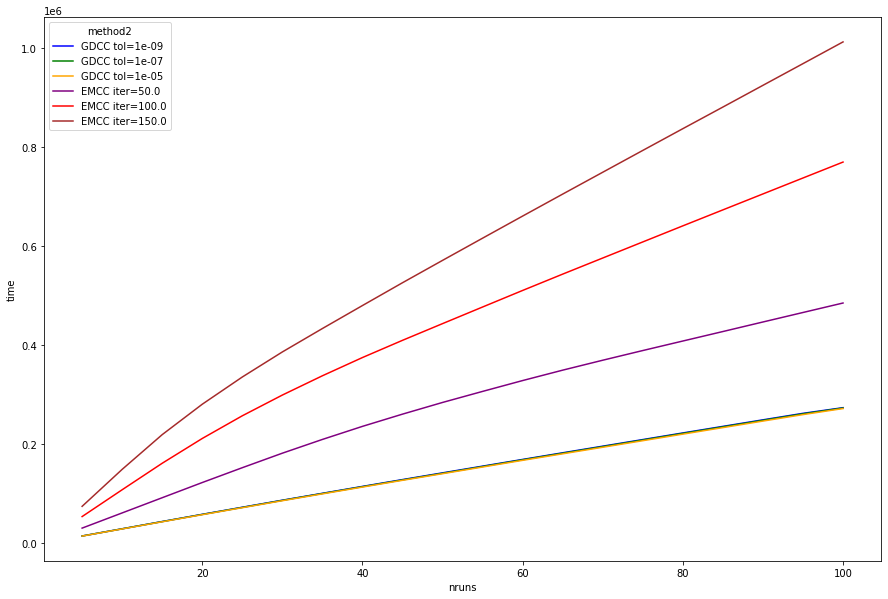

In [32]:
# Define custom colors for each method
custom_palette = {
    "GDCC tol=1e-09": "blue",
    "GDCC tol=1e-07": "green",
    "GDCC tol=1e-05": "orange",
    "EMCC iter=50.0": "purple",
    "EMCC iter=100.0": "red",
    "EMCC iter=150.0": "brown"
}

# Define the order based on increasing values
hue_order = ["GDCC tol=1e-09", "GDCC tol=1e-07", "GDCC tol=1e-05", 
             "EMCC iter=50.0", "EMCC iter=100.0", "EMCC iter=150.0"]

# Time with outliers removal
fig, ax = plt.subplots(figsize=(15, 10))
# Plot with custom colors and sorted legend
sns.lineplot(
    data=df.loc[df.remove_outliers==True], 
    x="nruns", y="time", 
    hue="method2", 
    errorbar=None, 
    palette=custom_palette, 
    hue_order=hue_order
)

<AxesSubplot:xlabel='nruns', ylabel='rmse'>

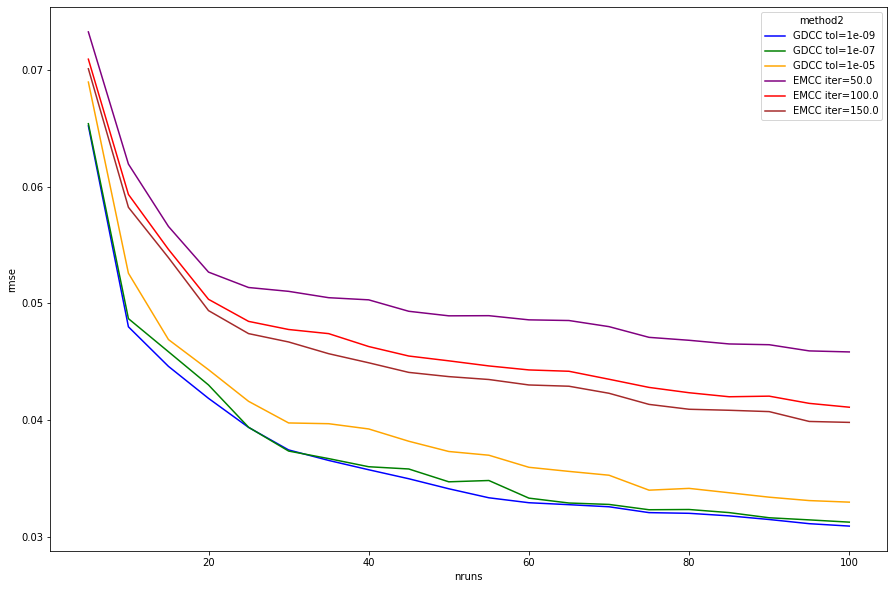

In [33]:
# Error with outliers removal
fig, ax = plt.subplots(figsize=(15, 10))
# Plot with custom colors and sorted legend
sns.lineplot(
    data=df.loc[df.remove_outliers==True], 
    x="nruns", y="rmse", 
    hue="method2", 
    errorbar=None, 
    palette=custom_palette, 
    hue_order=hue_order
)